<a href="https://colab.research.google.com/github/Kimjisue/python/blob/main/AIP_%EC%A3%BC%EC%8B%9D%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU

In [80]:
raw_df = pd.read_csv('/content/086520.KQ.csv')
raw_df['3MA'] = raw_df['Adj Close'].rolling(3).mean()
raw_df['5MA'] = raw_df['Adj Close'].rolling(5).mean()
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2022-06-02,79320.390625,79708.734375,78640.773438,79320.390625,78965.484375,131639,NaN,NaN
1,2022-06-03,80097.085938,80388.351563,78543.687500,78640.773438,78288.906250,179045,NaN,NaN
2,2022-06-07,78349.515625,78349.515625,75631.070313,75728.156250,75389.320313,309980,77547.903646,NaN
3,2022-06-08,76310.679688,76796.117188,74951.453125,75339.804688,75002.710938,186689,76226.979167,NaN
4,2022-06-09,74951.453125,76310.679688,73980.585938,76019.414063,75679.273438,217962,75357.101563,76665.139063


<function matplotlib.pyplot.legend(*args, **kwargs)>

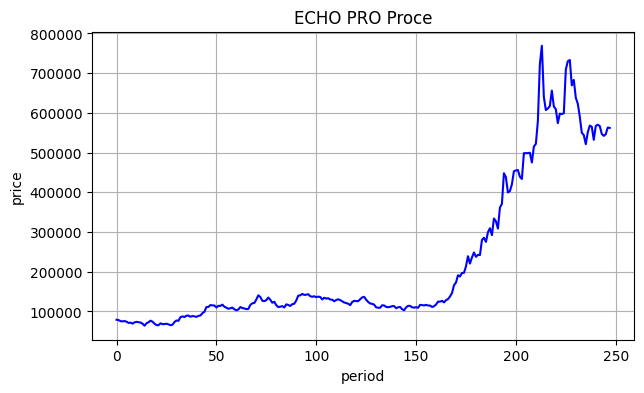

In [81]:
plt.figure(figsize=(7,4))
plt.title('ECHO PRO Proce')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(raw_df['Adj Close'], label = 'Adj Close', color = 'b')
plt.legend


In [82]:
# outlier 확인
raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,246.000000,244.000000
mean,221420.372590,231084.857611,213616.919796,222691.892484,222413.803239,1.024645e+06,221616.056551,220857.054105
std,190319.444671,200416.345984,180964.941973,190619.192158,190780.200597,7.900657e+05,189569.919353,188503.149850
min,64563.105469,66796.117188,62038.835938,64271.843750,63984.269531,1.130520e+05,66400.593750,67251.140625
25%,110050.728516,112563.833985,108203.884766,109975.728516,109603.357422,4.621475e+05,109645.022136,110575.835938
50%,124611.648438,127572.816407,122378.640625,124775.726562,124600.000000,7.634435e+05,125216.135417,125505.104688
75%,284625.000000,301125.000000,273875.000000,287125.000000,287125.000000,1.357410e+06,285041.666667,279775.000000
max,755000.000000,820000.000000,712000.000000,769000.000000,769000.000000,4.194375e+06,724000.000000,704800.000000


In [83]:
# Missing value 확인
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          2
5MA          4
dtype: int64

In [84]:
# missing value 제거
raw_df = raw_df.dropna()
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [85]:
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
4,2022-06-09,74951.453125,76310.679688,73980.585938,76019.414063,75679.273438,217962,75357.101563,76665.139063
5,2022-06-10,75048.546875,75533.984375,74466.015625,74466.015625,74132.828125,229925,74938.270834,75698.607813
6,2022-06-13,72233.007813,73592.234375,71067.960938,71359.226563,71039.937500,404075,73617.346354,74248.814063
7,2022-06-14,69029.125000,72330.093750,69029.125000,72135.921875,71813.164063,438208,72328.643229,73533.582813
8,2022-06-15,72427.187500,73980.585938,69320.390625,69611.648438,69300.179688,391029,70717.760417,72393.076563


In [86]:
#정규화 작업 (Date제외)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '3MA', '5MA'] #정규화 대상 column정의

scaled_df = scaler.fit_transform(raw_df[scale_cols]) #정규화 수행

print(type(scaled_df),'\n') #return is 넘파이

scaled_df = pd.DataFrame(scaled_df, columns = scale_cols) #Create normalized new Dataframe 
print(scaled_df)

<class 'numpy.ndarray'> 

         Open      High       Low  ...    Volume       3MA       5MA
0    0.015046  0.012632  0.018373  ...  0.025705  0.013620  0.014766
1    0.015187  0.011601  0.019120  ...  0.028636  0.012983  0.013250
2    0.011109  0.009023  0.013892  ...  0.071306  0.010974  0.010976
3    0.006468  0.007347  0.010755  ...  0.079669  0.009015  0.009854
4    0.011390  0.009539  0.011203  ...  0.068110  0.006565  0.008065
..        ...       ...       ...  ...       ...       ...       ...
239  0.714673  0.668085  0.743062  ...  0.088610  0.752636  0.767547
240  0.701638  0.653480  0.721522  ...  0.104972  0.738443  0.770684
241  0.700190  0.641531  0.712291  ...  0.110412  0.727798  0.764097
242  0.697293  0.668085  0.744600  ...  0.130500  0.735908  0.761901
243  0.729157  0.668085  0.758447  ...  0.049682  0.746046  0.760332

[244 rows x 8 columns]


In [87]:
feature_cols = ['3MA', '5MA', 'Adj Close']
label_cols = ['Adj Close']

label_df = pd.DataFrame(scaled_df, columns = label_cols)
feature_df = pd.DataFrame(scaled_df, columns = feature_cols)

print(feature_df)
print(label_df)

label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()


          3MA       5MA  Adj Close
0    0.013620  0.014766   0.016588
1    0.012983  0.013250   0.014395
2    0.010974  0.010976   0.010008
3    0.009015  0.009854   0.011105
4    0.006565  0.008065   0.007540
..        ...       ...        ...
239  0.752636  0.767547   0.685113
240  0.738443  0.770684   0.678021
241  0.727798  0.764097   0.683695
242  0.735908  0.761901   0.707808
243  0.746046  0.760332   0.706390

[244 rows x 3 columns]
     Adj Close
0     0.016588
1     0.014395
2     0.010008
3     0.011105
4     0.007540
..         ...
239   0.685113
240   0.678021
241   0.683695
242   0.707808
243   0.706390

[244 rows x 1 columns]


In [88]:
#입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature,label,window_size):
  feature_list=[] #생성될 feature list
  label_list = [] #생성될 label list

  for i in range(len(feature)-window_size):
    feature_list.append(feature[i:i+window_size])
    label_list.append(label[i+window_size])

  return np.array(feature_list), np.array(label_list)

In [89]:
#데이터 생성 - 입력 데이터 feature/정답데이터 label 

#학습데이터 x,y 생성 

window_size = 40
X,Y = make_sequene_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)


(204, 40, 3) (204, 1)


In [90]:
split = -200

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4, 40, 3) (4, 1)
(200, 40, 3) (200, 1)


In [91]:
model = Sequential()
model.add(GRU(256, activation = 'tanh', input_shape = x_train[0].shape))

model.add(Dense(1,activation = 'linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 256)               200448    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 200,705
Trainable params: 200,705
Non-trainable params: 0
_________________________________________________________________


In [92]:
#모델 컴파일 및 학습 
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss',patience=100)
model.fit(x_train, y_train ,validation_data=(x_test,y_test),epochs=100,batch_size=16,callbacks=[early_stop])

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.0029 - mae: 0.0537 - val_loss: 0.0301 - val_mae: 0.1055
Epoch 2/100
1/1 [==============================] - 0s 97ms/step - loss: 2.1541e-04 - mae: 0.0130 - val_loss: 0.0077 - val_mae: 0.0632
Epoch 3/100
1/1 [==============================] - 0s 97ms/step - loss: 5.7020e-04 - mae: 0.0231 - val_loss: 0.0052 - val_mae: 0.0562
Epoch 4/100
1/1 [==============================] - 0s 96ms/step - loss: 0.0012 - mae: 0.0334 - val_loss: 0.0061 - val_mae: 0.0582
Epoch 5/100
1/1 [==============================] - 0s 96ms/step - loss: 7.1065e-04 - mae: 0.0260 - val_loss: 0.0095 - val_mae: 0.0650
Epoch 6/100
1/1 [==============================] - 0s 88ms/step - loss: 1.9691e-04 - mae: 0.0126 - val_loss: 0.0147 - val_mae: 0.0742
Epoch 7/100
1/1 [==============================] - 0s 79ms/step - loss: 4.0011e-05 - mae: 0.0057 - val_loss: 0.0202 - val_mae: 0.0854
Epoch 8/100
1/1 [==============================] - 0s 76ms/step - loss: 

7/7 [==============================] - 0s 3ms/step


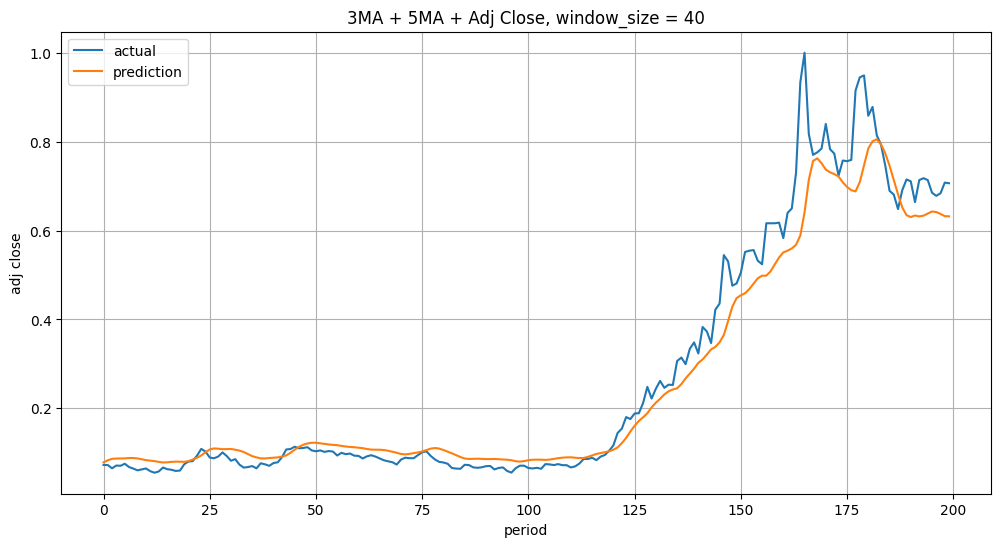

In [93]:
pred = model.predict(x_test)

plt.figure(figsize=(12,6))
plt.title('3MA + 5MA + Adj Close, window_size = 40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test,label = 'actual')
plt.plot(pred, label = 'prediction')
plt.grid()
plt.legend(loc='best')
plt.show()